Código Enade

In [25]:
import pandas
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats

enade2017 = pandas.read_csv("datasets\MICRODADOS_ENADE_2017.txt", sep=';',dtype={"DS_VT_ESC_OFG": str, 
                                                                               'DS_VT_ESC_OCE':str,
                                                                              'DS_VT_ACE_OCE':str,
                                                                              'NT_GER':str,
                                                                              'NT_FG':str,
                                                                              'NT_OBJ_FG':str,
                                                                              'NT_DIS_FG':str,
                                                                              'NT_CE':str,
                                                                              'NT_OBJ_CE':str,
                                                                              'NT_DIS_CE':str})


enade2017.shape
enade2017.columns[0:10]

''' CO_UF_CURSO
11 = Rondônia (RO)                              28 = Sergipe (SE)
12 = Acre (AC)                                         29 = Bahia (BA)
13 = Amazonas (AM)                            31 = Minas gerais (MG)
14 = Roraima (RR)                                  32 = Espírito santo (ES)
15 = Pará (PA)                                          33 = Rio de janeiro (RJ)
16 = Amapa (AP)                                    35 = São paulo (SP)
17 = Tocantins (TO)                               41 = Paraná (PR)
21 = Maranhão (MA)                             42 = Santa catarina (SC)
22 = Piauí (PI)                                           43 = Rio grande do sul (RS)
23 = Ceará (CE)                                        50 = Mato grosso do sul (MS)
24 = Rio Grande do Norte (RN)         51 = Mato grosso (MT)
25 = Paraíba (PB)                                     52 = Goiás (GO)
26 = Pernambuco (PE)                          53 = Distrito federal (DF)
27 = Alagoas (AL)   
'''

''' QE_I17
Em que tipo de escola você cursou o ensino médio?
A = Todo em escola pública.
B = Todo em escola privada (particular).
C = Todo no exterior.
D = A maior parte em escola pública.
E = A maior parte em escola privada (particular).
F = Parte no Brasil e parte no exterior
'''

''' CO_CATEGAD
Código da categoria administrativa da IES
1 = Pública Federal
2 = Pública Estadual
3 = Pública Municipal
4 = Privada com fins lucrativos
5 = Privada sem fins lucrativos
7 = Especial
'''

tabela = pandas.DataFrame(enade2017, columns = ['NT_GER', 'CO_CATEGAD', 'QE_I17', 'CO_UF_CURSO'])

##limpeza dos dados
#substitui vírgula por ponto
tabela['NT_GER'] = tabela['NT_GER'].str.replace(',', '.')

In [26]:
tabela = tabela.loc[(tabela['NT_GER'].notnull())]
tabela = tabela.loc[(tabela['QE_I17'].notnull())]
tabela = tabela.loc[(tabela['CO_CATEGAD'].notnull())]

tabela['NT_GER'] = pandas.to_numeric(tabela['NT_GER'])

tabela['QE_I17'] = tabela['QE_I17'].map({'A': 1, 'B': 2, 'C': 3, 'D': 1,'E': 2, 'F':3})
tabela.head(10)

,NT_GER,CO_CATEGAD,QE_I17,CO_UF_CURSO
0,52.6,1,2,51
1,63.1,1,1,51
2,33.7,1,2,51
3,58.1,1,1,51
4,46.3,1,2,51
5,64.2,1,1,51
6,41.4,1,1,51
7,48.8,1,2,51
8,52.9,1,1,51
9,62.7,1,2,51


In [28]:
federal = tabela[tabela['CO_CATEGAD'] == 1]
estadual = tabela[tabela['CO_CATEGAD'] == 2]
publica = tabela.loc[(tabela['CO_CATEGAD'] == 1) | (tabela['CO_CATEGAD'] == 2)]
particular = tabela.loc[(tabela['CO_CATEGAD'] == 4) | (tabela['CO_CATEGAD'] == 5)]

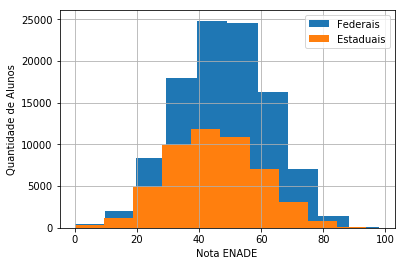

In [29]:
federal.NT_GER.loc[federal.CO_CATEGAD == 1].hist(label = "Federais")
estadual.NT_GER.loc[estadual.CO_CATEGAD == 2].hist(label = "Estaduais")


plt.xlabel("Nota ENADE")
plt.ylabel("Quantidade de Alunos")
plt.legend()

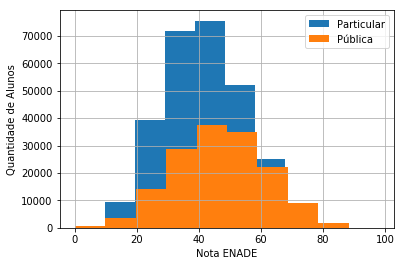

In [33]:
particular.NT_GER.loc[(particular.CO_CATEGAD == 4) | (particular.CO_CATEGAD == 5)].hist(label = "Particular")
publica.NT_GER.loc[(publica.CO_CATEGAD == 1) | (publica.CO_CATEGAD == 2)].hist(label = "Pública")


plt.xlabel("Nota ENADE")
plt.ylabel("Quantidade de Alunos")
plt.legend()

In [38]:
escola_publica = tabela[tabela['QE_I17'] == 1]
escola_privada = tabela[tabela['QE_I17'] == 2]
escola_exterior = tabela[tabela['QE_I17'] == 3]
#escola_exterior.head(500)
escola_exterior.describe()

,NT_GER,CO_CATEGAD,QE_I17,CO_UF_CURSO
count,1370.000000,1370.000000,1370.0,1370.000000
mean,48.266788,3.386861,3.0,35.730657
std,15.082083,1.662758,0.0,7.091884
min,0.000000,1.000000,3.0,11.000000
25%,37.325000,1.000000,3.0,32.000000
50%,48.600000,4.000000,3.0,35.000000
75%,59.500000,5.000000,3.0,41.000000
max,89.400000,7.000000,3.0,53.000000
